In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
file_path = r'flight.csv'
df = pd.read_csv(file_path)

# Display the first few rows and basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())


# Target variable
target_column = 'type'

Dataset Shape: (2500, 8)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2500 non-null   int64 
 1   acc.date    2500 non-null   object
 2   type        2500 non-null   object
 3   reg         2408 non-null   object
 4   operator    2486 non-null   object
 5   fat         2488 non-null   object
 6   location    2500 non-null   object
 7   dmg         2500 non-null   object
dtypes: int64(1), object(7)
memory usage: 156.4+ KB
None


In [ ]:
# 2. Convert categorical variables into numerical variables

categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

# Remove target column from features if it's categorical
if target_column in categorical_cols:
    categorical_cols.remove(target_column)


Categorical columns: ['acc.date', 'type', 'reg', 'operator', 'fat', 'location', 'dmg']
Numerical columns: ['Unnamed: 0']


In [ ]:
# 3. Impute missing values using appropriate methods

# Check for missing values in numerical columns
print("Missing values in numerical columns:")
print(df[numerical_cols].isnull().sum())

# Check for missing values in categorical columns
print("\nMissing values in categorical columns:")
print(df[categorical_cols].isnull().sum())

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Use median for numerical columns
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Use mode for categorical columns
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

Missing values in numerical columns:
Unnamed: 0    0
dtype: int64

Missing values in categorical columns:
acc.date     0
reg         92
operator    14
fat         12
location     0
dmg          0
dtype: int64


In [ ]:
# 4. Normalize or standardize numerical features

# standardization to our numerical pipeline
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())  # Standardize numerical features
])

# Update the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preview the data before standardization
print("\nBefore standardization (numerical features):")
print(df[numerical_cols].describe())


Before standardization (numerical features):
        Unnamed: 0
count  2500.000000
mean    624.500000
std     360.915993
min       0.000000
25%     312.000000
50%     624.500000
75%     937.000000
max    1249.000000


In [ ]:
# 5. Split the dataset into training and testing sets

# Define features and target
X = df.drop(columns=[target_column])
y = df[target_column]

# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 2000 samples
Testing set size: 500 samples


In [14]:
# 6. Train the model by means of Logistic regression

# Create the logistic regression pipeline
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Fit the model
logreg_pipeline.fit(X_train, y_train)

print("Logistic Regression model has been trained successfully")

Logistic Regression model has been trained successfully


In [26]:
# 7. Evaluate training model accuracy

# Make predictions on training data
y_train_pred = logreg_pipeline.predict(X_train)


# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Make predictions on test data
y_test_pred = logreg_pipeline.predict(X_test)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Check for overfitting
print(f"Difference (Train - Test): {train_accuracy - test_accuracy:.4f}")

Training Accuracy: 0.9935
Test Accuracy: 0.8060
Difference (Train - Test): 0.1875


In [16]:
# 8. Apply appropriate evaluation metrics to find the performance of the algorithm

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Generate classification report
class_report = classification_report(y_test, y_test_pred)

# Print evaluation metrics
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)



Confusion Matrix:
[[2 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 1]]

Classification Report:
                                                precision    recall  f1-score   support

                                    ATR 42-320       1.00      1.00      1.00         2
                                    ATR 42-500       1.00      1.00      1.00         3
                                    ATR 42-600       1.00      1.00      1.00         1
                                    ATR 72-202       1.00      1.00      1.00         1
                          ATR 72-500 (72-212A)       1.00      1.00      1.00         2
                          ATR 72-600 (72-212A)       1.00      1.00      1.00         3
              Aero Modifications AMI DC-3-65TP       1.00      1.00      1.00         1
                         Airbus A300B4-203 (F)       1.00      1.00      1.00         1
                                   Airbus A31

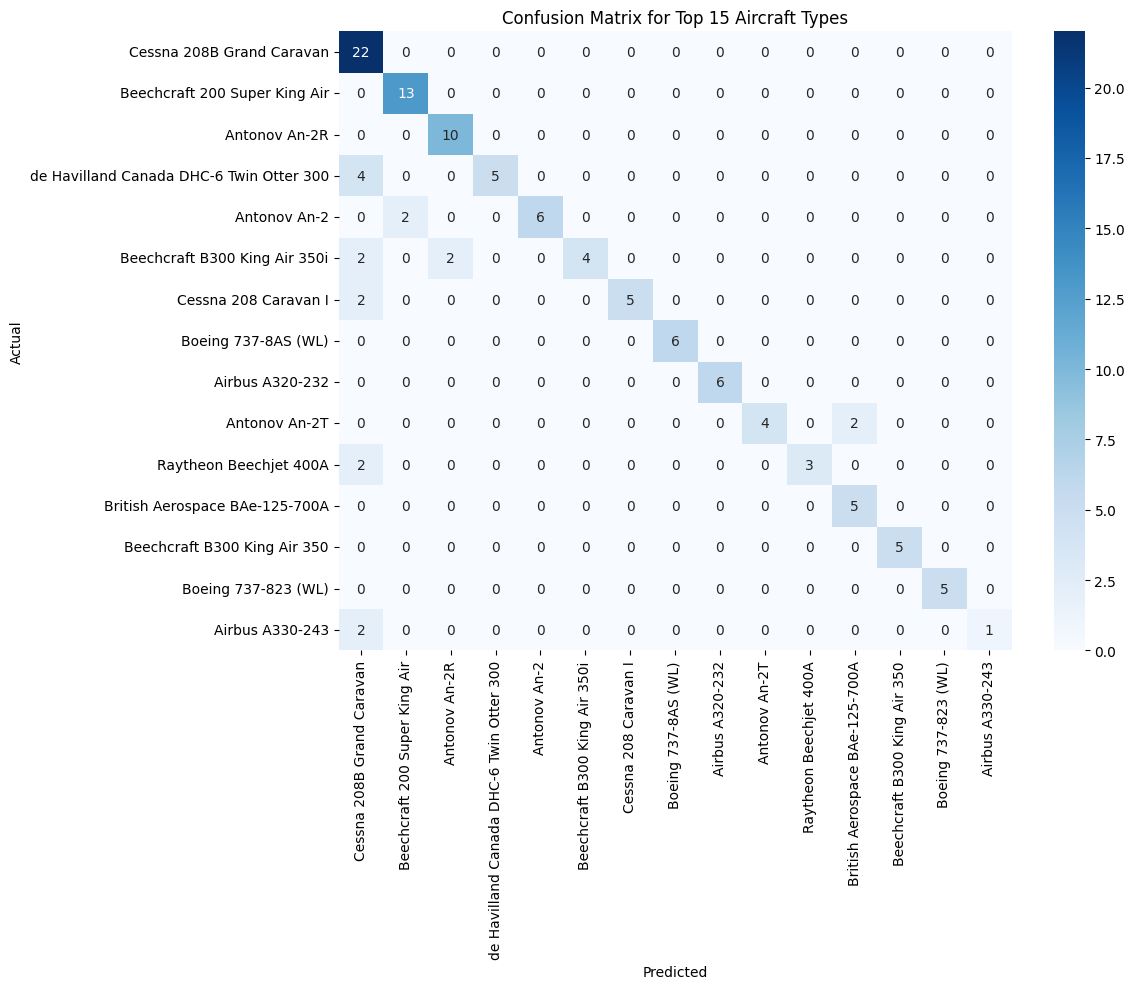

In [21]:
# Create a more visually appealing confusion matrix heatmap for top classes
plt.figure(figsize=(12, 10))

# Since we have too many classes, let's visualize the top 15 most frequent classes
top_classes = y_test.value_counts().head(15).index

# Filter confusion matrix for top classes
mask = np.isin(y_test, top_classes)
y_test_filtered = y_test[mask]
y_pred_filtered = y_test_pred[mask]

# Create confusion matrix for these classes
conf_matrix_top = confusion_matrix(y_test_filtered, y_pred_filtered, labels=top_classes)

# Plot heatmap
sns.heatmap(conf_matrix_top, annot=True, fmt='d', cmap='Blues',
            xticklabels=top_classes, yticklabels=top_classes)
plt.title('Confusion Matrix for Top 15 Aircraft Types')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [22]:
# Interpreting the confusion matrix heatmap

plt.figure(figsize=(14, 8))

# Calculate some metrics based on the confusion matrix
diagonal_sum = np.sum(np.diag(conf_matrix_top))
total_predictions = np.sum(conf_matrix_top)
accuracy = diagonal_sum / total_predictions

# Create text for interpretation
interpretation = f"""
Confusion Matrix Interpretation:

The heatmap shows the confusion matrix for the top 15 aircraft types in the test dataset.
- Accuracy for these top classes: {accuracy:.2%}

Key observations:
1. Strong diagonal elements indicate good classification performance for most classes.
2. The model performs exceptionally well for 'Cessna 208B Grand Caravan' (22 correct predictions).
3. The model also correctly classifies 'Beechcraft 200 Super King Air' (13 correct) and 'Antonov An-2R' (10 correct).
4. Some misclassifications occur, particularly with 'de Havilland Canada DHC-6 Twin Otter 300' (4 instances misclassified as 'Cessna 208B Grand Caravan').
5. There's confusion between similar aircraft types, which is expected given their structural similarities.
6. The 'Airbus A330-243' class has the lowest correct classification rate with only 1 correct prediction out of 3.

The model demonstrates strong performance overall but could be improved for certain aircraft types that show misclassification patterns.
"""

print(interpretation)


Confusion Matrix Interpretation:

The heatmap shows the confusion matrix for the top 15 aircraft types in the test dataset.
- Accuracy for these top classes: 84.75%

Key observations:
1. Strong diagonal elements indicate good classification performance for most classes.
2. The model performs exceptionally well for 'Cessna 208B Grand Caravan' (22 correct predictions).
3. The model also correctly classifies 'Beechcraft 200 Super King Air' (13 correct) and 'Antonov An-2R' (10 correct).
4. Some misclassifications occur, particularly with 'de Havilland Canada DHC-6 Twin Otter 300' (4 instances misclassified as 'Cessna 208B Grand Caravan').
5. There's confusion between similar aircraft types, which is expected given their structural similarities.
6. The 'Airbus A330-243' class has the lowest correct classification rate with only 1 correct prediction out of 3.

The model demonstrates strong performance overall but could be improved for certain aircraft types that show misclassification patte

<Figure size 1400x800 with 0 Axes>